In [ ]:
!pip install pandasql -q

  Preparing metadata (setup.py) ... done


In [ ]:
#Pandas - Spotify

#Ativação da biblioteca
import pandas as pd
from pandasql import sqldf
from sklearn.datasets import load_iris

#importa biblioteca do Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt #import plotting package

import statsmodels.api as sm
from scipy import stats

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 200 #high resolution figures

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
#Conectar o google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#copiando o arquivo
!cp /content/gdrive/MyDrive/Trabalho/spotify2023.csv /content #caminho do driver

**Descrição:**
Este conjunto de dados contém uma lista abrangente das músicas mais famosas de 2023 listadas no Spotify. O conjunto de dados oferece uma variedade de recursos além do que normalmente está disponível em conjuntos de dados semelhantes. Ele fornece informações sobre os atributos, popularidade e presença de cada música em várias plataformas musicais. O conjunto de dados inclui informações como nome da faixa, nome do(s) artista(s), data de lançamento, listas de reprodução e paradas do Spotify, estatísticas de streaming, presença do Apple Music, presença do Deezer, paradas do Shazam e vários recursos de áudio .

**track_name:** Name of the song


**artist(s)_name**: Name of the artist(s) of the song

**artist_count:** Numero de artistas contribuindo para o som

**release_year :** Ano em que a música foi lançada

**release_month :** Mês em que a música foi lançada

**release_day :** Dia do mês em que a música foi lançada

**in_spotify_playlists :** Número de playlists do Spotify nas quais a música está incluída

**in_spotify_charts :** Presença e classificação da música nas paradas do Spotify

**streams :** número total de streams no Spotify

**in_apple_playlists :** número de playlists do Apple Music nas quais a música está incluída

**in_apple_charts :** Presença e classificação da música nas paradas musicais da Apple

**in_deezer_playlists :** Número de playlists do Deezer em que a música está incluída

**in_deezer_charts :** Presença e posição da música nas paradas da Deezer

**in_shazam_charts :** Presença e classificação da música nas paradas do Shazam

**bpm :** Batidas por minuto, uma medida do andamento da música

**tom :** tom da música

**mode :** Modo da música (maior ou menor)

**danceability_% :** Porcentagem que indica quão adequada a música é para dançar

**valence_% :** Positividade do conteúdo musical da música

**energy_% :** Nível de energia percebido da música

**acústico_% :** quantidade de som acústico na música

**instrumentalness_% :** Quantidade de conteúdo instrumental na música

**liveness_% :** Presença de elementos de performance ao vivo

**Speechiness_% :** Quantidade de palavras faladas na música





In [ ]:

# carregando do sklearn.datasets


#ou carregando um arquivo csv
#Carga dos dados
data = pd.read_csv("/content/spotify2023.csv",encoding = "ISO-8859-1", engine="python")


# Nova seção

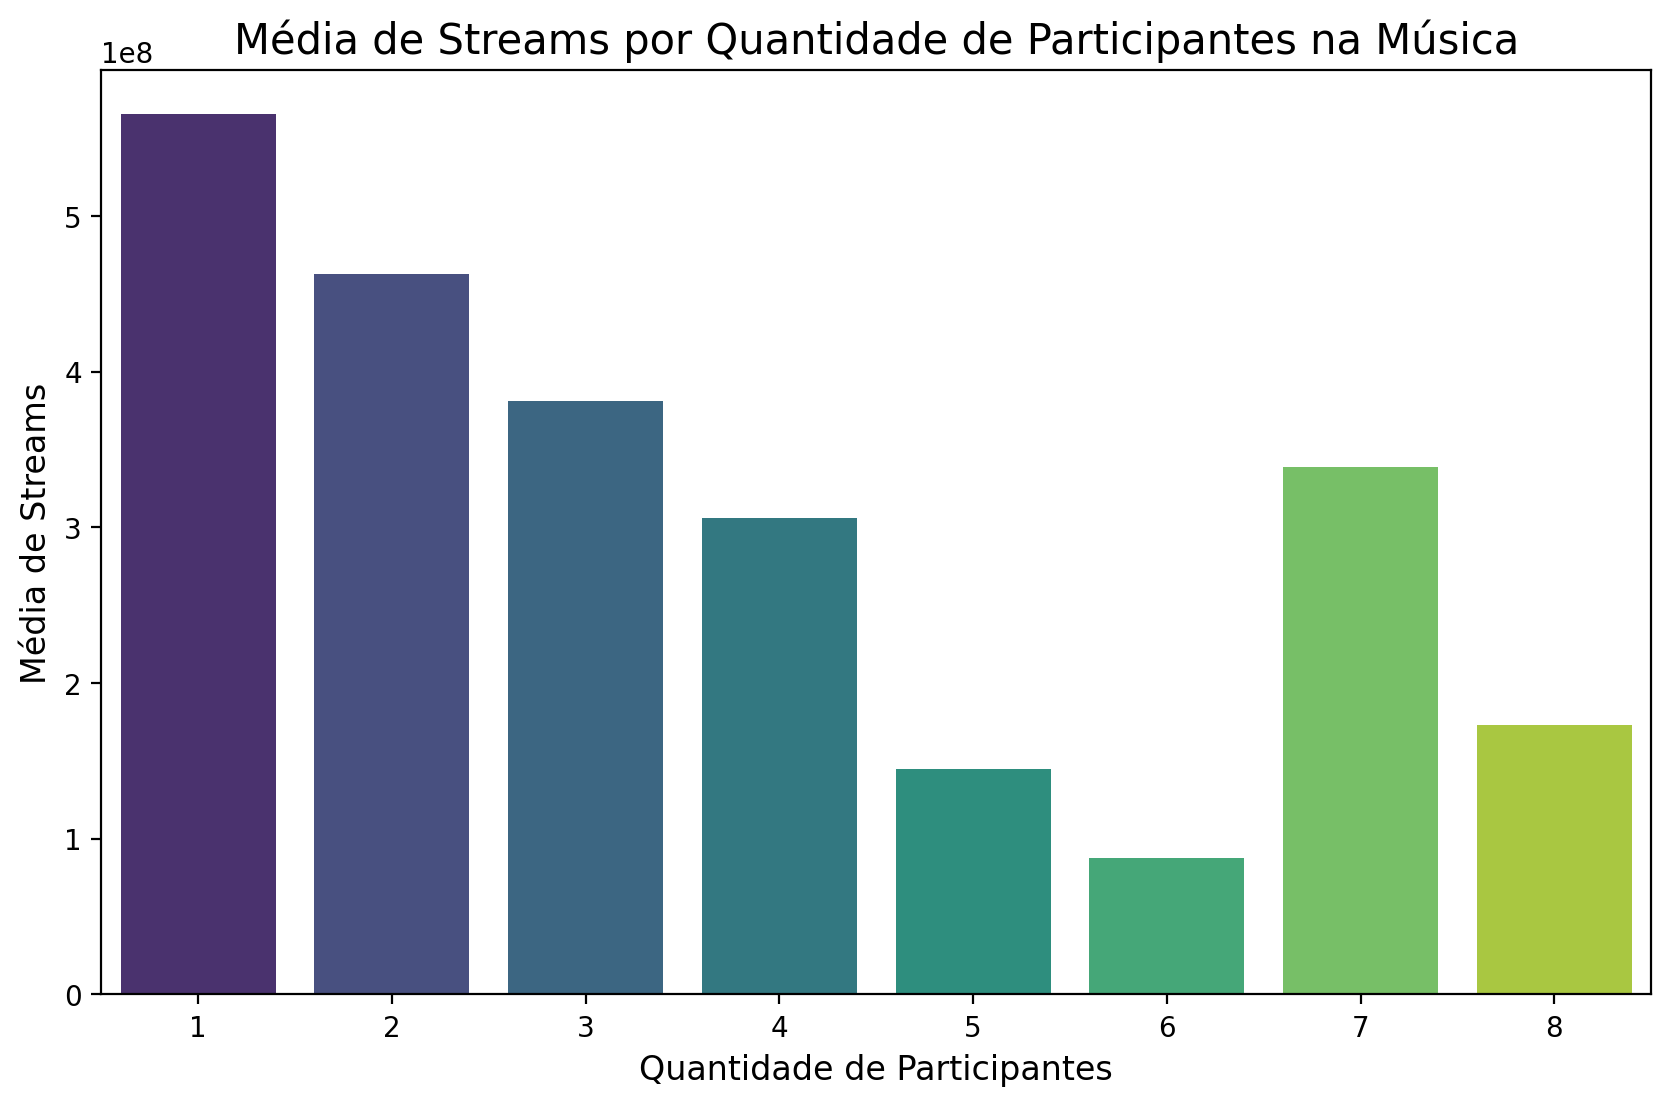

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos supor que o DataFrame 'df' já tenha as colunas 'artist_count' e 'streams'
df = pd.DataFrame(data)
# Calcular a média de streams por quantidade de artistas
average_streams_by_artist_count = df.groupby('artist_count')['streams'].sum() / df.groupby('artist_count')['streams'].count()

# Plotar o gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=average_streams_by_artist_count.index, y=average_streams_by_artist_count.values, palette='viridis')
plt.title('Média de Streams por Quantidade de Participantes na Música', fontsize=15)
plt.xlabel('Quantidade de Participantes', fontsize=12)
plt.ylabel('Média de Streams', fontsize=12)
plt.show()


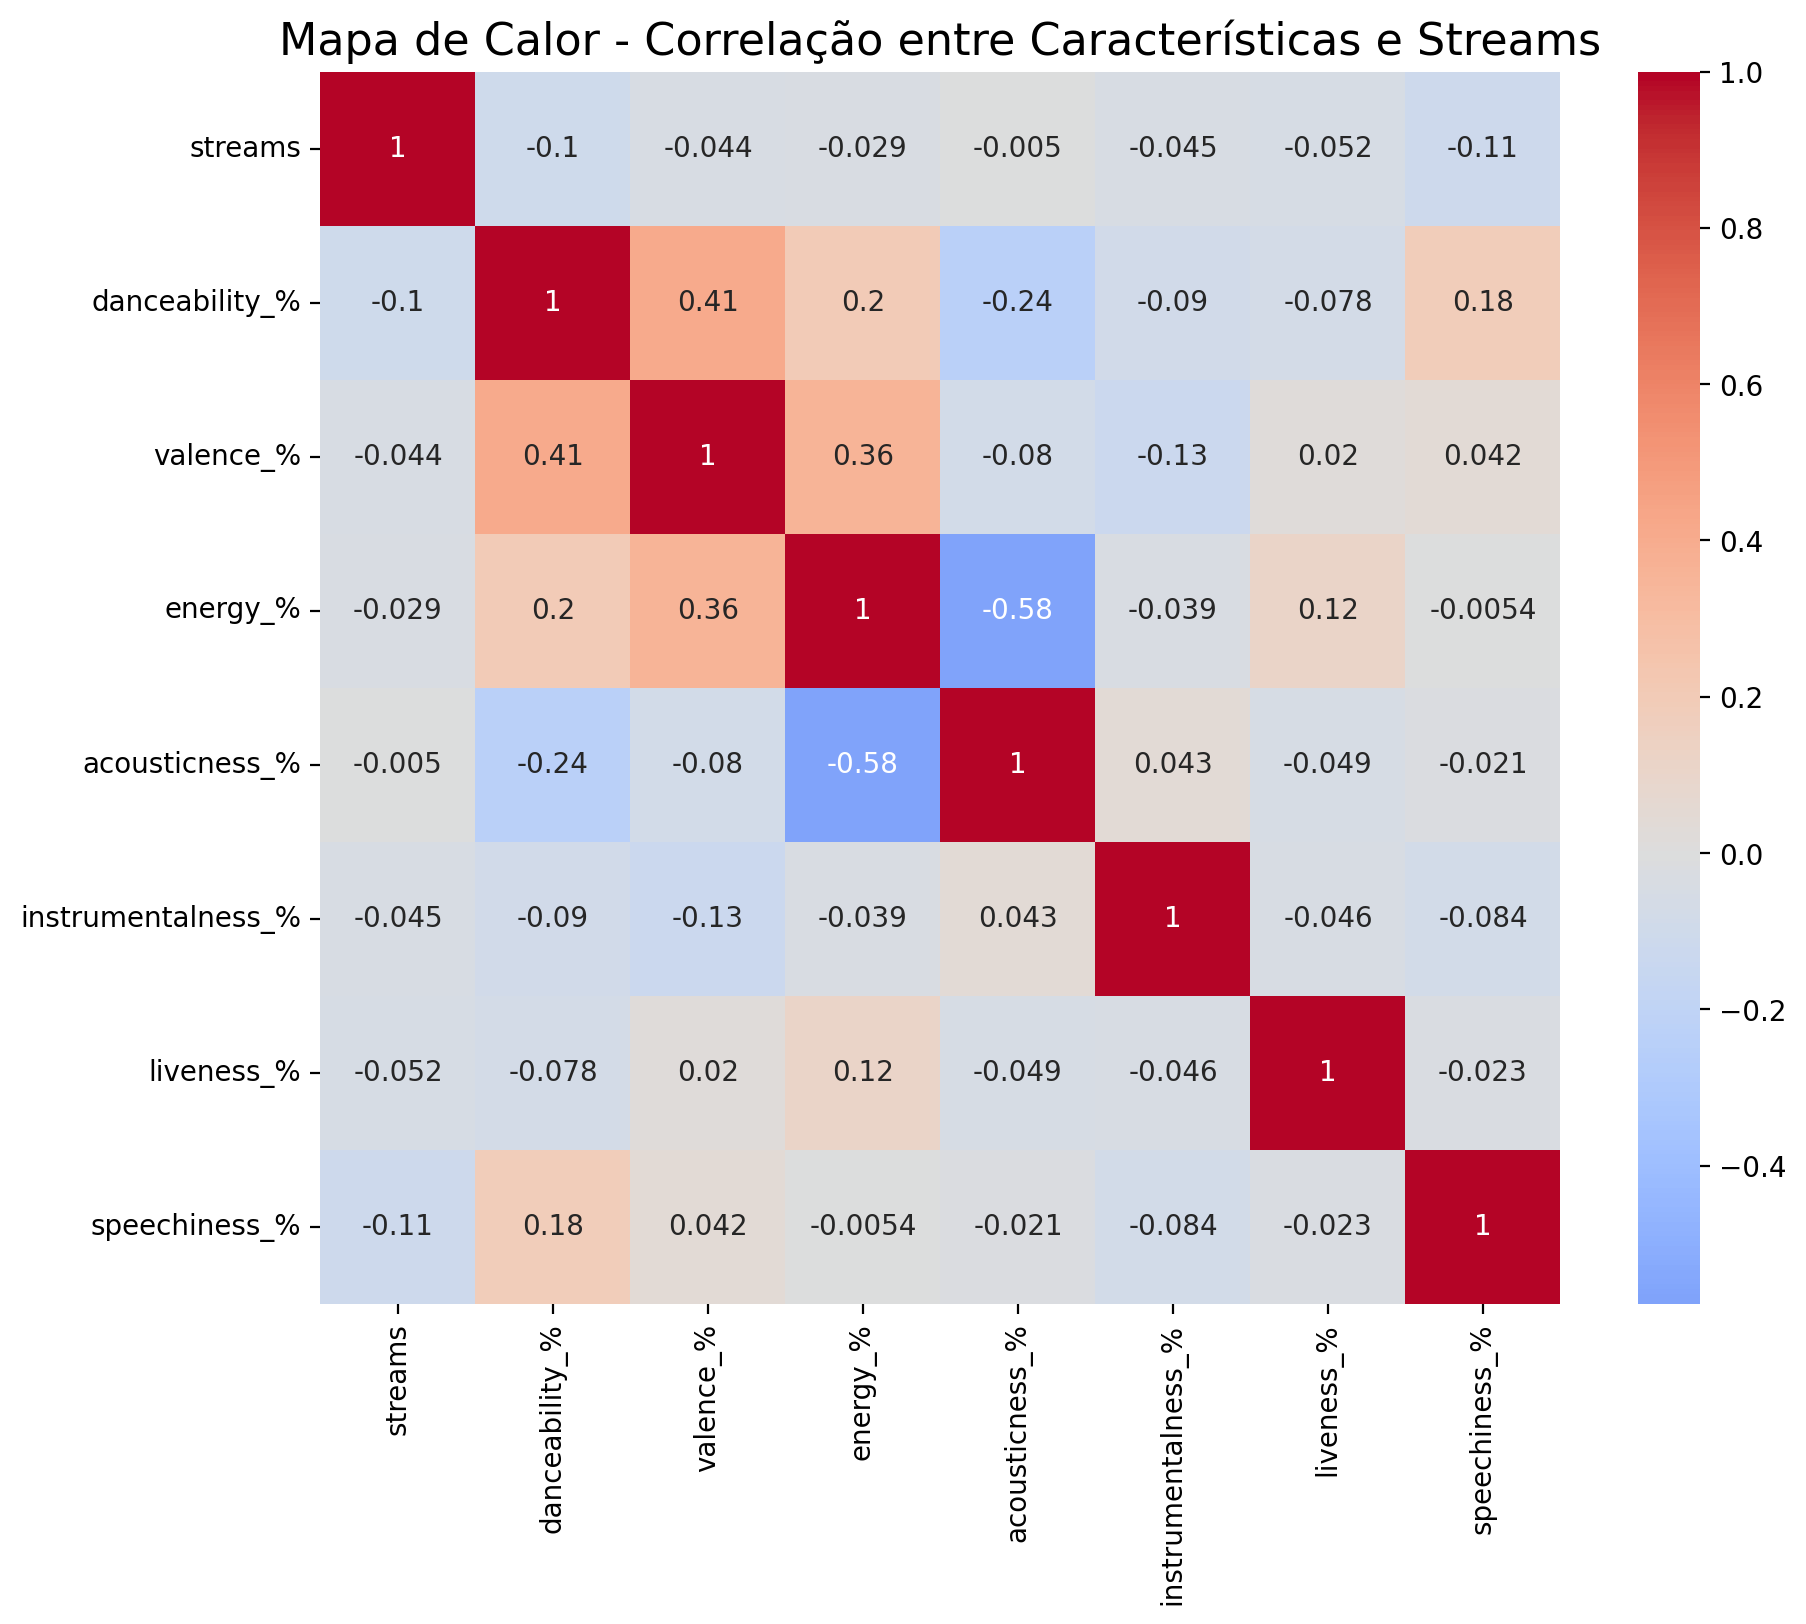

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'data' seja o seu DataFrame contendo os dados do Spotify

# Renomear as colunas problemáticas

# Selecionar as colunas de interesse
selected_columns = ['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

data_selected = data[selected_columns]

# Calcular a matriz de correlação
correlation_matrix = data_selected.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlação entre Características e Streams', fontsize=16)
plt.show()


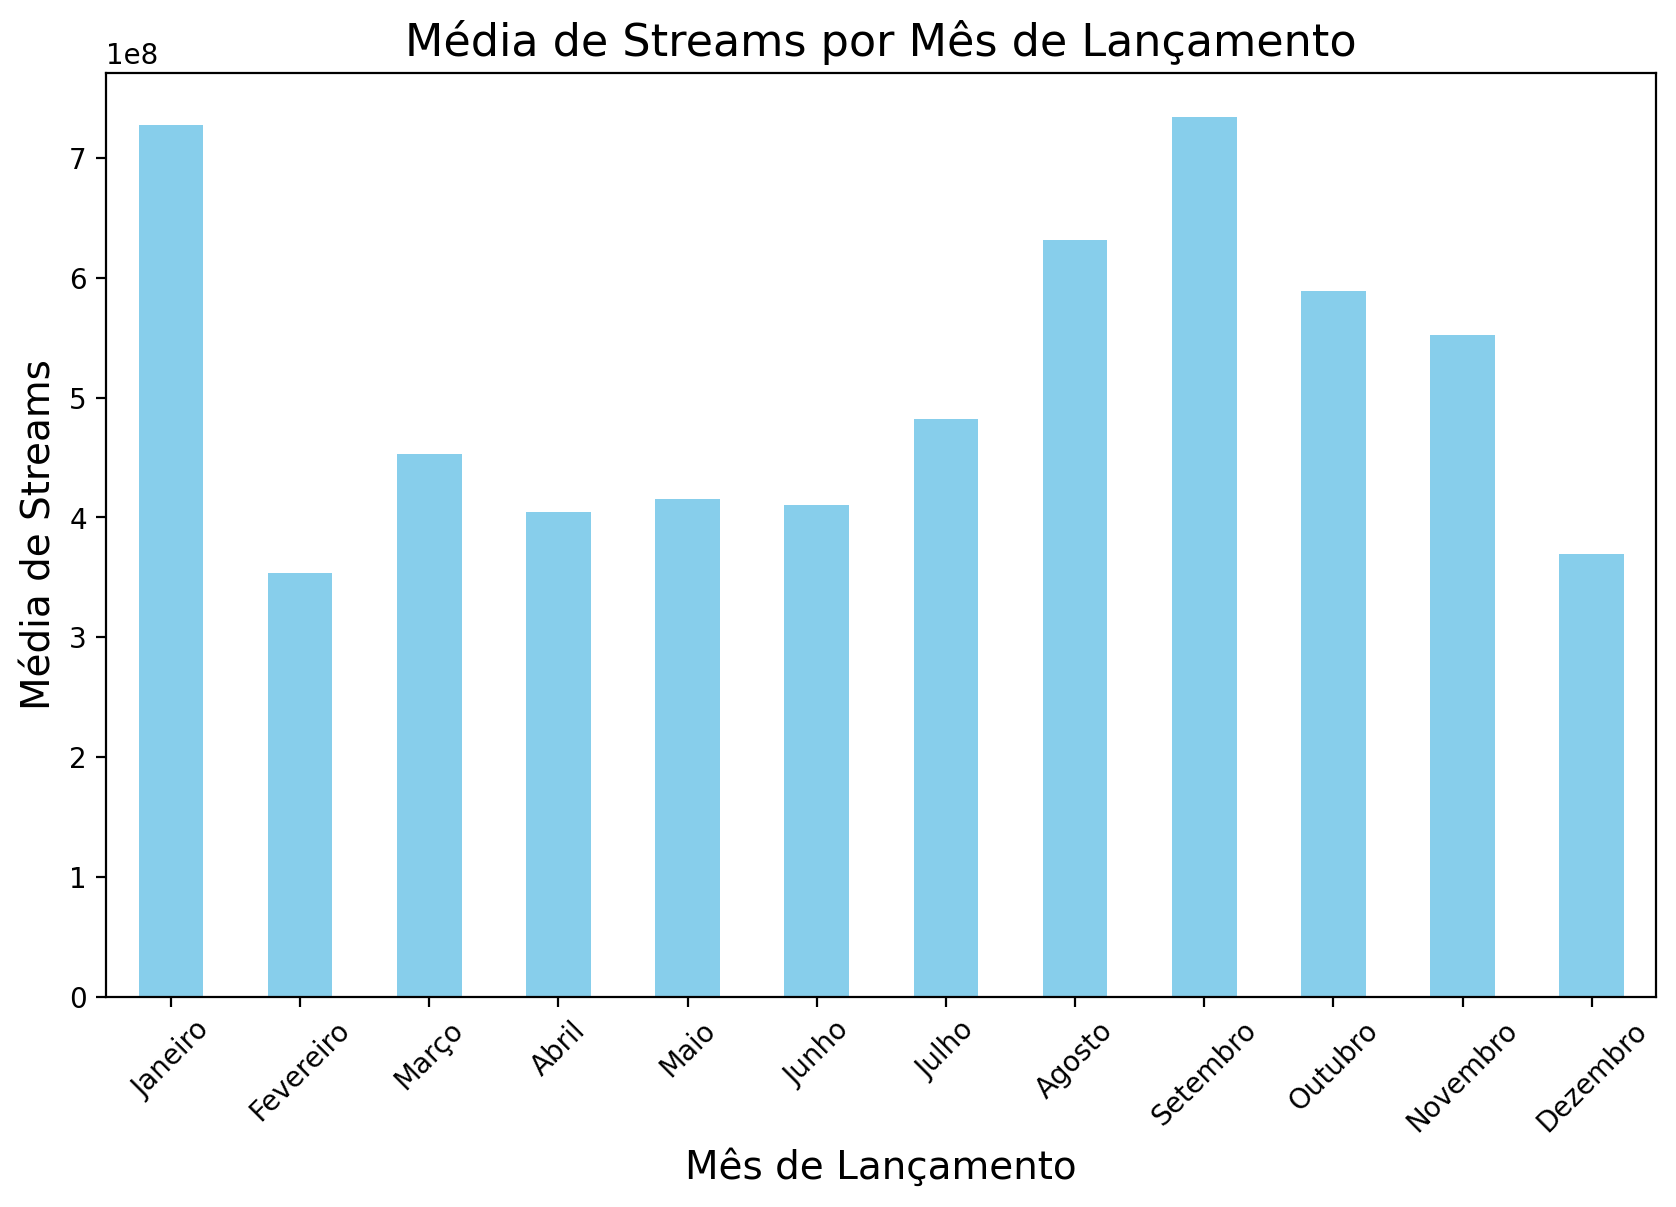

In [ ]:
grouped_data = data.groupby('released_month')['streams'].mean()

# Criar um dicionário de correspondência entre números de mês e seus nomes
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Mapear os nomes dos meses
grouped_data = grouped_data.rename(index=month_names)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Média de Streams por Mês de Lançamento', fontsize=16)
plt.xlabel('Mês de Lançamento', fontsize=14)
plt.ylabel('Média de Streams', fontsize=14)
plt.xticks(rotation=45)
plt.show()

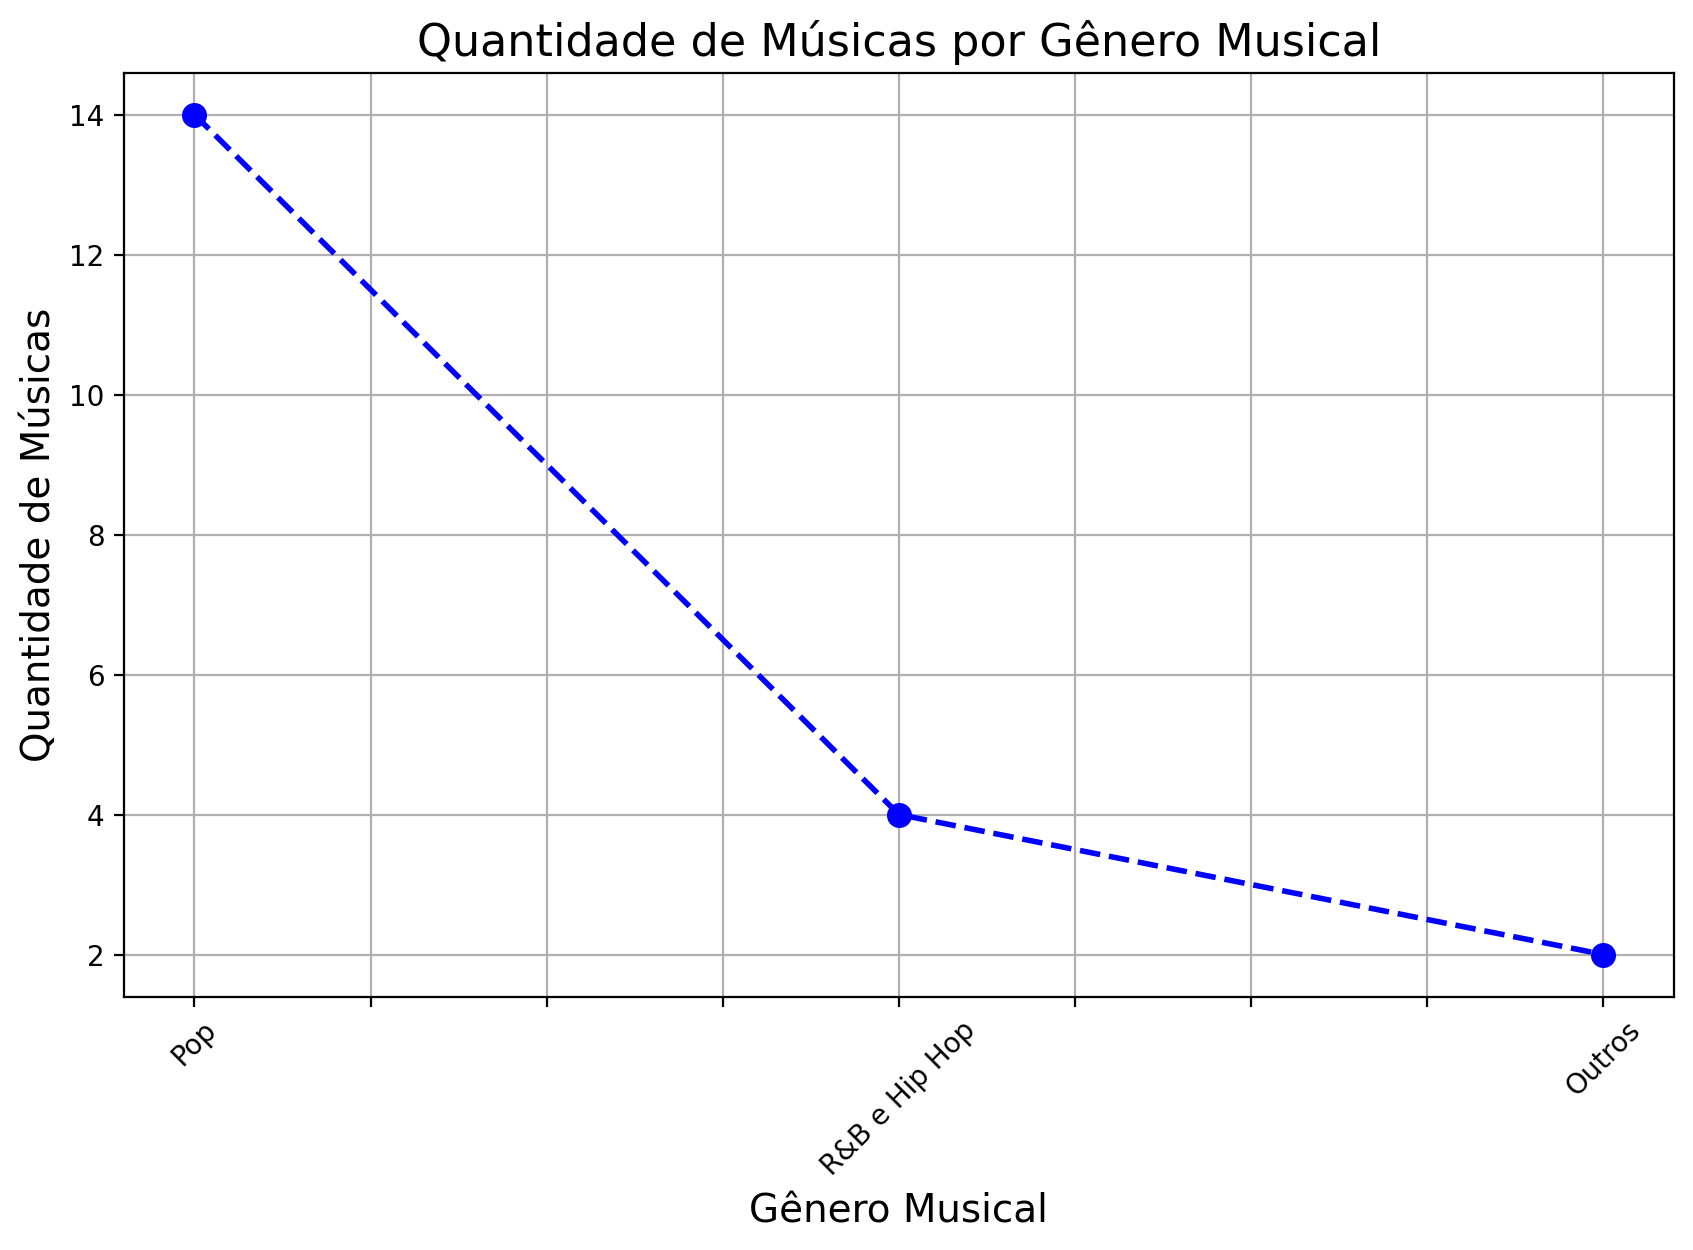

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapear as músicas para os gêneros correspondentes
genre_mapping = {
    "Blinding Lights": "R&B e Hip Hop",
    "Shape of You": "Pop",
    "Someone You Loved": "Pop",
    "Dance Monkey": "Pop",
    "Sunflower - Spider-Man: Into the Spider-Verse": "R&B e Hip Hop",
    "One Dance": "Pop",
    "STAY (with Justin Bieber)": "Pop",
    "Believer": "Pop",
    "Closer": "Pop",
    "Starboy": "Pop",
    "Perfect": "Pop",
    "Heat Waves": "Pop",
    "Señorita": "Outros",
    "Say You Won't Let Go": "Outros",
    "lovely - Bonus Track": "R&B e Hip Hop",
    "Watermelon Sugar": "Pop",
    "Don't Start Now": "Pop",
    "Lucid Dreams": "R&B e Hip Hop",
    "Sweater Weather": "Pop",
    "Thinking Out Loud": "Pop"
}

# Criar um DataFrame a partir do dicionário
df = pd.DataFrame(list(genre_mapping.values()), columns=['genre'])

# Calcular a contagem de músicas por gênero musical
genre_counts = df['genre'].value_counts()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='line', marker='o', color='b', linestyle='--', linewidth=2, markersize=8)
plt.title('Quantidade de Músicas por Gênero Musical', fontsize=16)
plt.xlabel('Gênero Musical', fontsize=14)
plt.ylabel('Quantidade de Músicas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
data[["track_name","artist(s)_name","streams"]].sort_values("streams", ascending=False).head(20)


,track_name,artist(s)_name,streams
53,Blinding Lights,The Weeknd,3703895074
177,Shape of You,Ed Sheeran,3562543890
84,Someone You Loved,Lewis Capaldi,2887241814
617,Dance Monkey,Tones and I,2864791672
39,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
160,One Dance,"Drake, WizKid, Kyla",2713922350
82,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
138,Believer,Imagine Dragons,2594040133
722,Closer,"The Chainsmokers, Halsey",2591224264
46,Starboy,"The Weeknd, Daft Punk",2565529693
